<a href="https://colab.research.google.com/github/nsricharan/Assignment2ML/blob/main/Assignment2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the pandas library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the provided CSV file 'data.csv' using pandas:

In [ ]:
df = pd.read_csv('sample_data/data.csv')

2. Show the basic statistical description about the data.

In [ ]:
des = df.describe()
print(des)

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


3. Check if the data has null values.
  a. Replace the null values with the mean


In [ ]:
null_vals = df.isnull().sum()
print("Null values:\n", null_vals)

df.fillna(df.mean(), inplace=True)

Null values:
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


4. Select at least two columns and aggregate the data using: min, max, count, mean.

In [ ]:
aggr = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print("Aggregated Data:\n", aggr)

Aggregated Data:
          Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


5. Filter the dataframe to select the rows with calories values between 500 and1000

In [ ]:
flt_data = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print("Filtered Data (Calories between 500 and 1000):\n", flt_data)

Filtered Data (Calories between 500 and 1000):
      Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


6. Filter the dataframe to select the rows with calories values > 500 and pulse <100.

In [ ]:
flt_data2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print("Filtered Data (Calories > 500 and Pulse < 100):\n", flt_data2)

Filtered Data (Calories > 500 and Pulse < 100):
      Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

In [ ]:
df_mod = df.drop('Maxpulse', axis=1)
print("df_modified:\n", df_mod)

df_modified:
      Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


8. Delete the “Maxpulse” column from the main df dataframe

In [ ]:
df.drop('Maxpulse', axis=1, inplace=True)

9. Convert the datatype of Calories column to int datatype.


In [ ]:
df['Calories'] = df['Calories'].astype(int)

10. Using pandas create a scatter plot for the two columns (Duration and Calories).

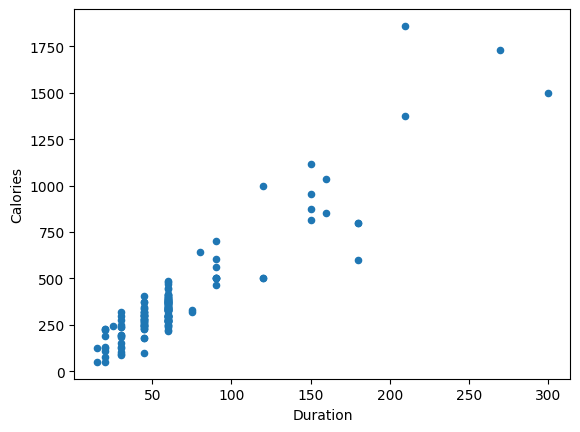

In [ ]:
df.plot.scatter(x='Duration', y='Calories')
plt.show()

2. Scikit-learn
  **Naïve Bayes method**
    1. Implementing Naïve Bayes method using scikit-learnlibrary.
    
    a. Use the glass dataset available in Link also provided in your assignment.

In [24]:
#Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load the glass dataset
glass_data = pd.read_csv('sample_data/glass.csv')     #reading csv file
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


b. Preparing the data for modeling using **train_test_split** to create training and testing part.

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_true = train_test_split(glass_data[::-1], glass_data['Type'], test_size = 0.2, random_state = 0)

In [15]:
#Training the Naïve Bayes model:
# Creating a Gaussian Naïve Bayes classifier
nb_classifier = GaussianNB()

# Training the classifier using the training data
nb_classifier.fit(X_train, y_train)

GaussianNB()

2. Evaluate the model on testing part using score and classification_report(y_true,y_pred)

In [23]:
# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_pred,y_true)
print("Accuracy Score:", accuracy)

# Generate the classification report
classification_rep = classification_report(y_true, y_pred)
print("Classification Report:\n", classification_rep)

# Prediction Summary
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

Accuracy Score: 0.7674418604651163
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.89      0.94        19
           3       0.00      0.00      0.00         5
           5       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         2
           7       0.46      1.00      0.63         6

    accuracy                           0.77        43
   macro avg       0.45      0.57      0.48        43
weighted avg       0.73      0.77      0.73        43

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.89      0.94        19
           3       0.00      0.00      0.00         5
           5       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         2
           7       0.46      1.00      0.63         6

    accuracy      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

2. Scikit-learn
  **SVC Method**
   1. Implement linear SVM method using scikit library
    
    a. Use the glass dataset available in Link also provided in your assignment.

In [28]:
# Importing the libraries
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Loading the glass dataset
glass_data1 = pd.read_csv('sample_data/glass.csv')     #reading csv file
glass_data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


b. Use train_test_split to create training and testing part.

In [29]:
X_train, X_test, y_train, y_true = train_test_split(glass_data1[::-1], glass_data1['Type'], test_size = 0.2, random_state = 0)

In [33]:
#Training the Naïve Bayes model:
# Creating a Gaussian Naïve Bayes classifier
svm_classifier = SVC()

# Training the classifier using the training data
svm_classifier.fit(X_train, y_train)

SVC()

2. Evaluate the model on testing part using score and classification_report(y_true,y_pred)

In [34]:
y_pred = svm_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Visualizations to describe or show correlations in the Glass Dataset.***

<Axes: xlabel='Type', ylabel='Ca'>

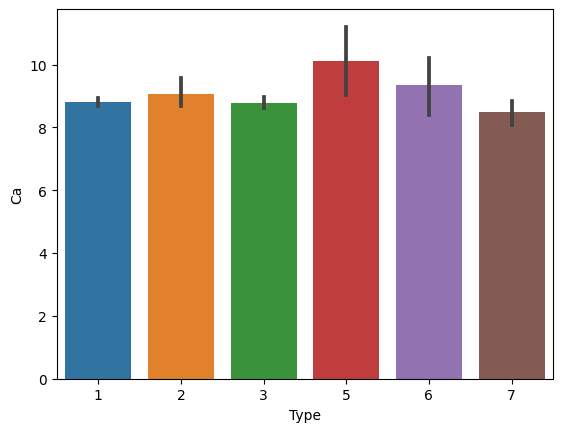

In [36]:
#Library for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = glass_data1['Type'], y = glass_data1['Ca'])

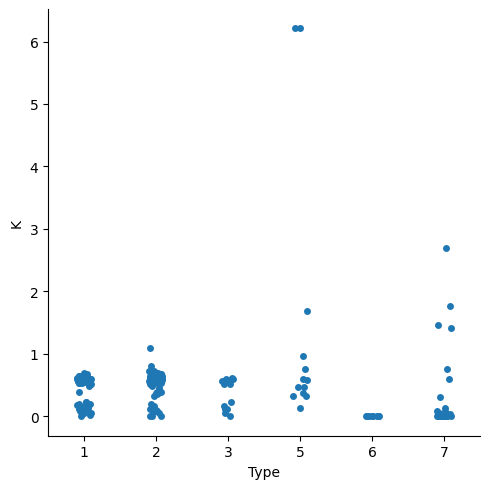

In [37]:
sns.catplot(data=glass, x="Type", y="K")